In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import time

In [2]:
def generate_matrix(nodes=100, edges=500):    

    matrix = np.zeros((nodes,nodes), dtype=int)

    for _ in range(edges):
        x = np.random.randint(nodes)
        y = np.random.randint(nodes)

        while matrix[x, y] == 1:
            x = np.random.randint(nodes)
            y = np.random.randint(nodes)

        if x != y and matrix[x, y] == 0:
            matrix[x, y] = 1
            matrix[y, x] = 1
    
    return matrix

In [3]:
matrix = generate_matrix(100, 200)
graph = nx.from_numpy_matrix(matrix)

In [4]:
adjecency_list = nx.to_dict_of_lists(graph)

In [5]:
adjecency_list

{0: [10],
 1: [30, 41, 52, 79],
 2: [50, 51, 97],
 3: [21, 27, 34, 44, 45, 90, 99],
 4: [16],
 5: [54, 81, 86],
 6: [33],
 7: [16, 33, 41, 63, 70, 73],
 8: [25, 98],
 9: [20, 40, 66, 72, 95, 96],
 10: [0, 34, 63, 66, 96],
 11: [35, 40, 48, 88],
 12: [59, 67, 71, 75, 78],
 13: [27, 62, 76, 83],
 14: [19, 28, 83],
 15: [23],
 16: [4, 7],
 17: [75, 77],
 18: [54],
 19: [14, 48],
 20: [9, 54, 68],
 21: [3, 45, 52, 61, 73],
 22: [29, 46, 48, 96],
 23: [15, 58, 69, 79, 92],
 24: [28, 73, 74, 85, 98],
 25: [8, 37, 48, 90],
 26: [41, 65, 67],
 27: [3, 13, 36, 72, 95],
 28: [14, 24, 37, 54, 59, 70, 77, 94],
 29: [22, 32, 42, 53, 79],
 30: [1, 63],
 31: [96],
 32: [29, 63, 70, 76],
 33: [6, 7, 95],
 34: [3, 10, 76],
 35: [11, 82],
 36: [27, 42, 49, 53, 82],
 37: [25, 28, 40, 41, 57, 93],
 38: [78, 93],
 39: [44, 86],
 40: [9, 11, 37, 56],
 41: [1, 7, 26, 37, 43, 53, 56, 82],
 42: [29, 36, 54, 82, 84, 89],
 43: [41, 58, 61, 74, 85],
 44: [3, 39, 70, 76, 80],
 45: [3, 21],
 46: [22],
 47: [50, 56,

In [6]:
matrix[0:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

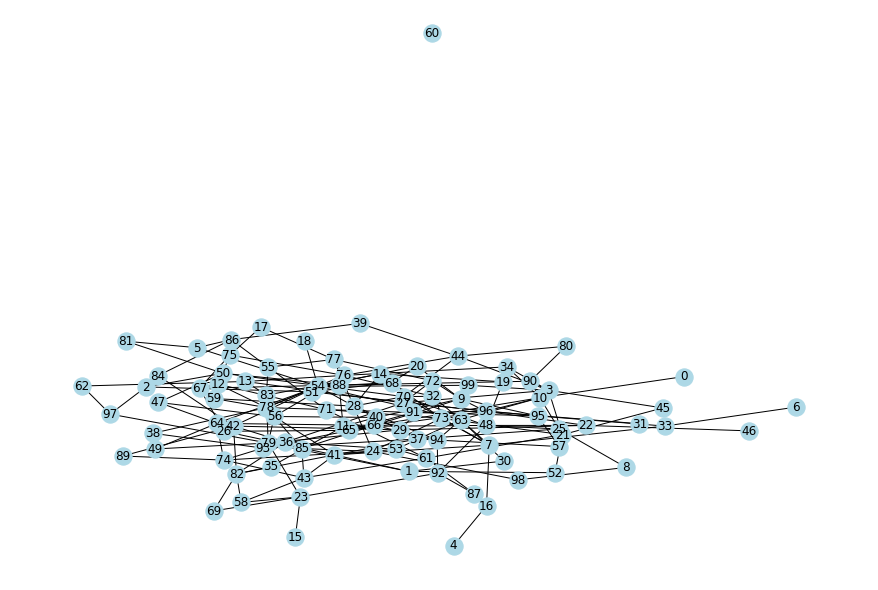

In [7]:
plt.figure(figsize=(12,8))
nx.draw(graph, node_color = "lightblue", with_labels=True)

In [8]:
def dfs(v, adjecency_list, visited, out_component):
    visited[v] = True
    out_component.append(v)
    for neighbour in adjecency_list[v]:
        if not visited[neighbour]:
            dfs(neighbour, adjecency_list, visited, out_component)

In [9]:
def connected_components(V, adjecency_list):
    components = []
    visited = [False for _ in range(len(V))]

    for v in V:
        if not visited[v]:
            component = []
            dfs(v, adjecency_list, visited, component)
            components.append(component)

    return components

In [10]:
for component in connected_components(list(adjecency_list.keys()), adjecency_list):
    print(component)

[0, 10, 34, 3, 21, 45, 52, 1, 30, 63, 7, 16, 4, 33, 6, 95, 9, 20, 54, 5, 81, 50, 2, 51, 68, 73, 24, 28, 14, 19, 48, 11, 35, 82, 36, 27, 13, 62, 97, 79, 23, 15, 58, 43, 41, 26, 65, 66, 64, 47, 56, 40, 37, 25, 8, 98, 90, 80, 44, 39, 86, 55, 71, 12, 59, 78, 38, 93, 74, 89, 42, 29, 22, 46, 96, 31, 91, 70, 32, 76, 75, 17, 77, 72, 67, 88, 53, 61, 87, 92, 94, 84, 83, 85, 57, 49, 69, 18, 99]
[60]


In [13]:
def bfs_shortest_path(adjecency_list, start, goal):
    paths = [[start]]
    visited = {k :False for k in adjecency_list}
    visited[start] = True
    queue = [start]

    while queue:
        v = queue.pop(0)
        current_path = paths.pop(0)

        if v == goal:
            return current_path

        for neighbour in adjecency_list[v]:
            if not visited[neighbour]:
                visited[neighbour] = True
                queue.append(neighbour)

                new_path = list(current_path)
                new_path.append(neighbour)
                paths.append(new_path)
    return []

In [14]:
bfs_shortest_path(adjecency_list, 0, 14)

[0, 10, 63, 54, 28, 14]

In [15]:
x, y = 10, 20
obstacle = 40

# generating a graph
graph = nx.grid_2d_graph(x, y)
nodes = list(graph.nodes())

# creating obstacles
nds = []
while len(nds) < obstacle:
    node_to_remove = np.random.randint(len(nodes))
    if nodes[node_to_remove] not in nds:
        nds.append(nodes[node_to_remove])

graph.remove_nodes_from(nds)
nodes = list(graph.nodes())

In [16]:
adjecency_list = nx.to_dict_of_lists(graph)

In [17]:
path = bfs_shortest_path(adjecency_list, (0, 1), (1, 9))

In [18]:
path

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9)]

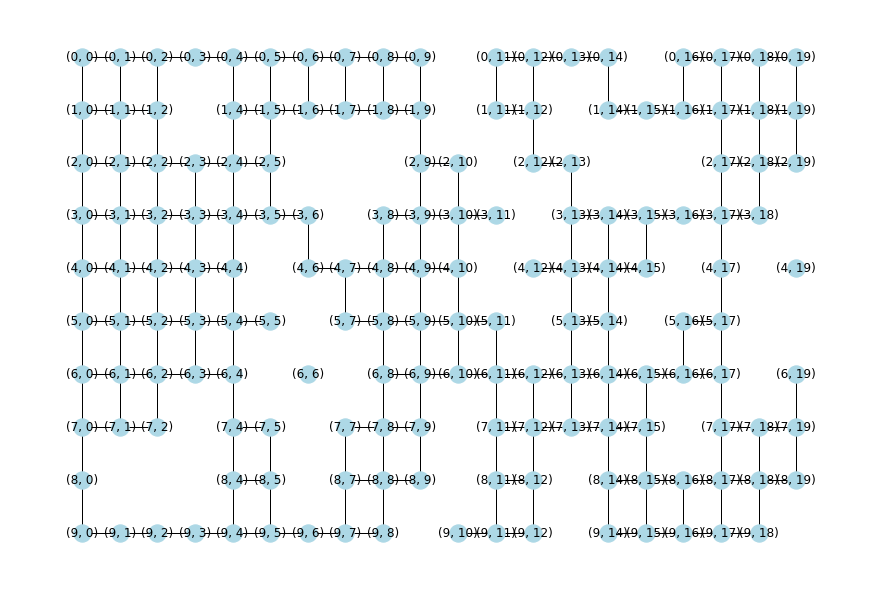

In [19]:
pos = {(x,y):(y,-x) for x, y in graph.nodes()}

plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, node_color="lightblue")

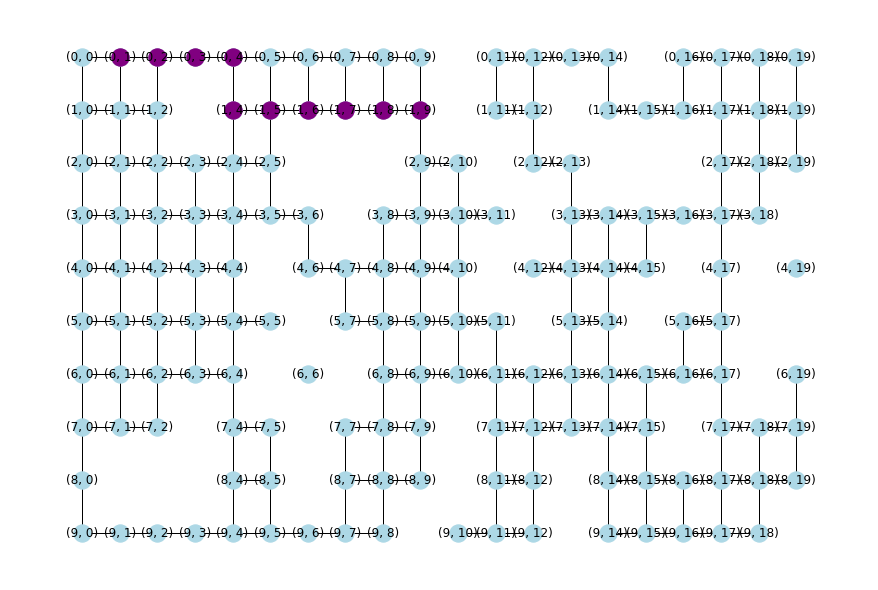

In [20]:
plt.figure(figsize=(12, 8))

nx.draw(graph, pos, with_labels=True, node_color="lightblue")
nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color="purple")